## 1. BUSINESS UNDERSTANDING


In the context of the telecom industry, building a predictive model to forecast customer churn for SyriaTel, a telecommunications company, is crucial for business sustainability and growth. Identifying patterns that precede customer attrition allows SyriaTel to proactively address potential issues and retain valuable customers. The predictive model aims to assess how effectively it can anticipate customer churn, providing insights into the factors influencing retention. This understanding is pivotal for SyriaTel's management, enabling informed decision-making to enhance customer satisfaction and loyalty. Insights into the significance of various features in predicting churn contribute to strategic planning, allowing SyriaTel to allocate resources efficiently and tailor retention strategies. Recommendations derived from the model offer actionable insights into specific scenarios where predictions are most useful, guiding the business in adapting variables to achieve targeted outcomes. Ultimately, this predictive approach empowers SyriaTel to implement preemptive measures, reduce customer churn, and foster long-term relationships with its clientele.

## 2. DATA UNDERSTANDING
In this section, we will focus on the initial steps of a data analysis, which involve importing the data and conducting an audit or examination of the dataset. our aim at this stage is essential checking and ensuring on the data's quality, understanding its structure, and preparing it for subsequent analysis.

In [1]:
# Importing Necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Ridge, BayesianRidge, Ridge, Lasso, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder 
from sklearn.inspection import PartialDependenceDisplay

### 2.1 Data Loading, Data Viewing and Data Description

In [2]:
# loading data
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [3]:
# Viewing the first 10 rows
df.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [4]:
# Checking the total number of rows and columns of the dataset
df.shape

(3333, 21)

In [5]:
# checking the details of the column
for column in df.columns:
    print(column)

state
account length
area code
phone number
international plan
voice mail plan
number vmail messages
total day minutes
total day calls
total day charge
total eve minutes
total eve calls
total eve charge
total night minutes
total night calls
total night charge
total intl minutes
total intl calls
total intl charge
customer service calls
churn


In [6]:
# Understanding the data, i.e total entries, datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
# Understanding the data and description
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### 2.2 Checking for Duplicates, Null values and Outliers

In [11]:
# Checking for duplicates
duplicates = df.duplicated().sum()
duplicates

0

In [10]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [12]:
# Checking null values
null_values = df.isnull().sum()
null_values

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

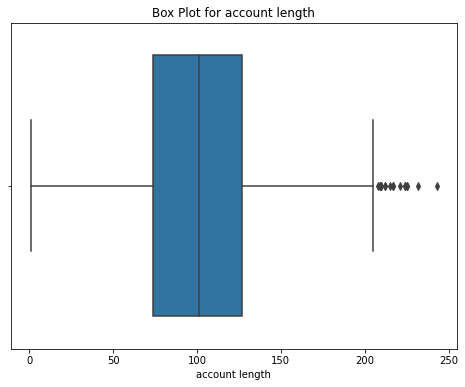

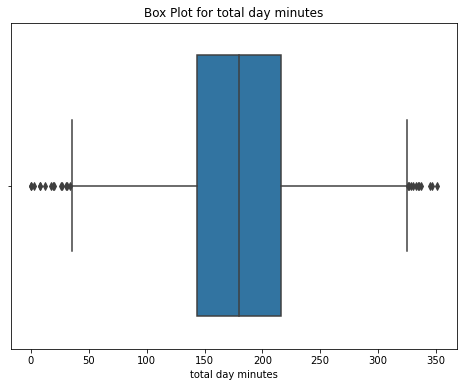

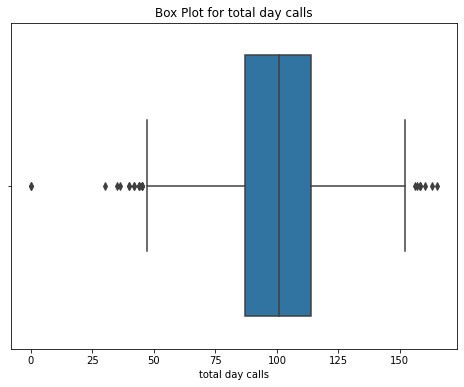

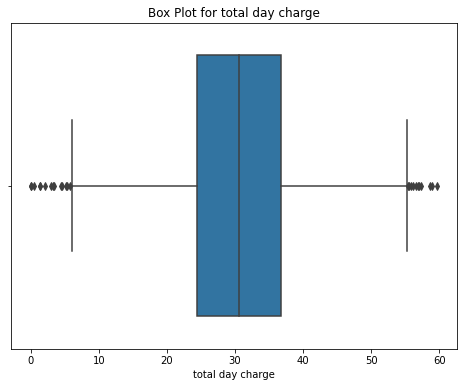

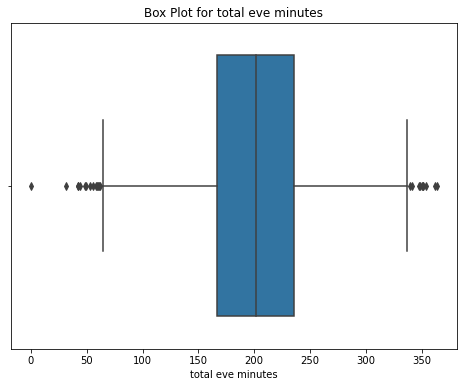

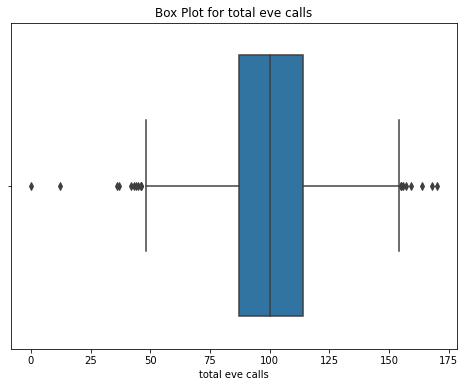

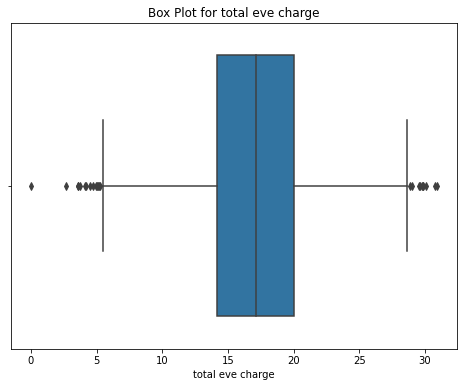

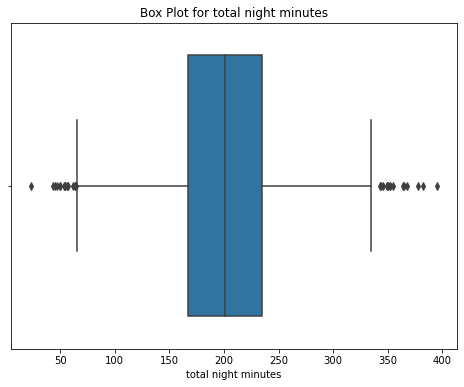

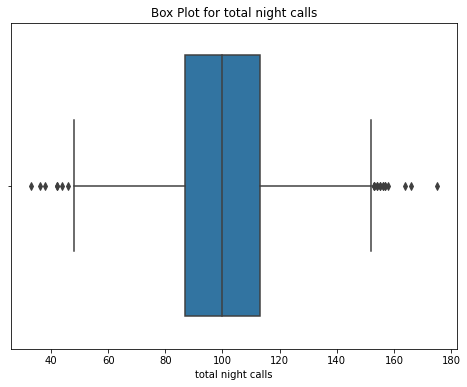

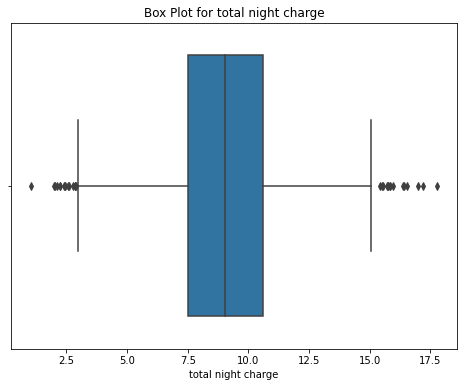

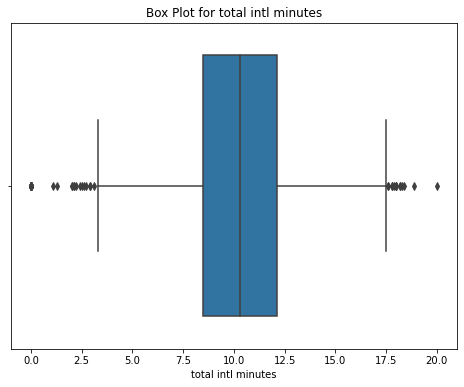

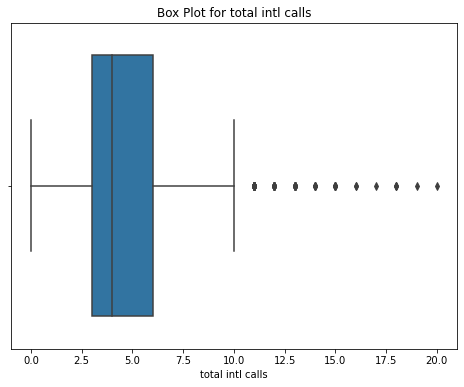

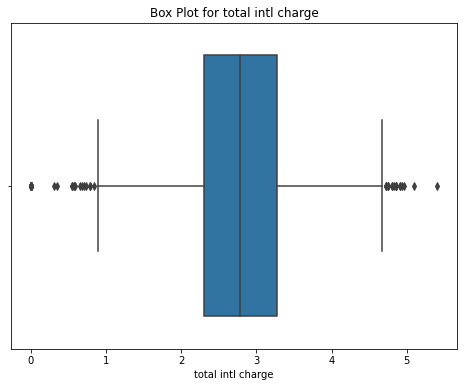

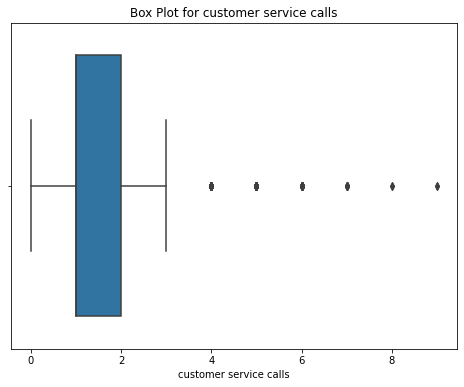

In [17]:
# Checking for outliers
columns_of_interest = ['account length', 'total day minutes', 'total day calls', 'total day charge', 
                        'total eve minutes', 'total eve calls', 'total eve charge', 
                        'total night minutes', 'total night calls', 'total night charge', 
                        'total intl minutes', 'total intl calls', 'total intl charge', 
                        'customer service calls']
# Creating a box plot for each column
for column in columns_of_interest:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

Upon reviewing the dataset as shown above, the dataset has no null values, no duplicates, no missing values and no outliers.

## 3. DATA PREPARATION

This is a crucial phase in the data science pipeline, encompassing both data preprocessing and analysis to ensure that raw datasets are transformed into a clean, structured format suitable for effective modeling. It involves handling missing values, outliers, and duplicates, as well as scaling and encoding variables to improve the quality and relevance of the data. 
Concurrently, data analysis entails exploring and understanding the dataset through descriptive statistics, visualizations, and correlation analyses, unveiling patterns, relationships, and potential biases. This iterative process sets the foundation for building robust machine learning models, enhancing their predictive capabilities and reliability by addressing challenges within the data. A meticulous approach to data preparation is essential for deriving meaningful insights and fostering the success of subsequent analytical endeavors.

### 3.1 Categorical Values
In this section we focus on analyzing and understanding categorical variables. This process is crucial for gaining insights into the distribution and characteristics of categorical variables.


In [21]:
categoricals = []  # List to store categorical columns
numerics = []     # List to store numeric columns

for column in df.columns:
    if df[column].dtype == 'object':
        categoricals.append(column)  # Append object-type columns to categoricals list
    else:
        numerics.append(column)  # Append numeric-type columns to numerics list
def print_value_counts(dataframe, columns):
    for column in columns:
        print(f"Value counts for '{column}':")
        
        # Calculate value counts
        value_counts = dataframe[column].value_counts(dropna=False)
        
        print(value_counts)
        print("\n\n")

In [22]:
# print value counts for categorical columns
print_value_counts(df, categoricals)

Value counts for 'state':
WV    106
MN     84
NY     83
AL     80
OR     78
OH     78
WI     78
VA     77
WY     77
CT     74
MI     73
VT     73
ID     73
UT     72
TX     72
IN     71
KS     70
MD     70
MT     68
NJ     68
NC     68
WA     66
CO     66
NV     66
MS     65
RI     65
MA     65
AZ     64
MO     63
FL     63
ME     62
NM     62
ND     62
OK     61
DE     61
NE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64



Value counts for 'phone number':
380-5286    1
386-7976    1
391-2231    1
338-6714    1
405-7204    1
           ..
340-5460    1
337-1586    1
346-3445    1
352-6976    1
356-4832    1
Name: phone number, Length: 3333, dtype: int64



Value counts for 'international plan':
no     3010
yes     323
Name: international plan, dtype: int64



Value counts for 'voice mail plan':
no     2411
yes     922
Name: voice mail plan, dtype: int